In [35]:
import cv2
import torch
import numpy as np
import torchsummary

from matplotlib import pyplot as plt
import segmentation_models_pytorch as smp
from torchvision import transforms, utils
from torch.utils.data import Dataset, DataLoader


In [49]:
model = smp.DeepLabV3Plus(encoder_name='resnet34', classes=3, activation='softmax', )

In [50]:
model.eval()
model(torch.randn(1, 3, 224, 224)).shape

/home/zephyr/.local/lib/python3.10/site-packages/segmentation_models_pytorch/base/modules.py:104: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)


torch.Size([1, 3, 224, 224])

In [52]:
out = model(torch.randn(1, 3, 224, 224))
out.dtype

/home/zephyr/.local/lib/python3.10/site-packages/segmentation_models_pytorch/base/modules.py:104: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)


torch.float32

In [8]:
torchsummary.summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

/home/zephyr/.local/lib/python3.10/site-packages/segmentation_models_pytorch/base/modules.py:104: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)


In [24]:
image_path = '/home/zephyr/Desktop/Newcastle_University/11_FP_D/Dataset/Dataset/1.training/1.training'
mask_path = '/home/zephyr/Desktop/Newcastle_University/11_FP_D/Dataset/1.training_pseudo_labels'

In [25]:
image_path_list = []

In [26]:
def img_list(data_path, label_path):
  # getting list of all the images
  images = os.listdir(data_path)
  #exc_list = ['[1, 1, 0]', '[1, 0, 1]', '[0, 1, 1]', '[1, 1, 1]']
  # setting the flag based on the image path
  '''
  if path == orig_image_path:
    flag = 0
  else:
    flag = 1
  '''
  # don't need the flag, just resize all the images while loading to (224, 224)

  # adding to the image_path_list
  for i in images:
    # adding the image path, flag and the label
    #image_path_list[0].append([path + '/' + str(i), flag, list(map(int, i[-13:-4].strip('][').split(', ')))])
    #print(list(map(int, i[-13:-4].strip('][').split(', '))))
    if 'DS_S' in str(i):
      continue
    image_path_list.append([data_path + '/' + str(i), label_path + '/' + str(i)])

In [27]:
img_list(image_path, mask_path)

In [28]:
np.random.shuffle(image_path_list)

In [37]:
# Creating the dataset class for the data

class LUAD(Dataset):
  """Lung Adenocarcinoma Histopathological images."""
  
  def __init__(self, image_list, transform = None):
    
    """
      Args:
        image_list: csv/list/numpy array containing image paths, flag and labels.
        transform (callable, optional): Optional transform to be applied on a sample.
        """
    #Loading the csv file containing the image paths and one-hot encoded labels
    #self.image_paths_labels = pd.read_csv(csv_file)
    self.image_list = image_list
    self.transform = transform

  def __len__(self):
    return len(self.image_list)
  
  def __getitem__(self, idx):
    if torch.is_tensor(idx):
      idx = idx.tolist()
    
    # code when input is a csv file
    '''
    image = cv2.imread(image_paths_labels.iloc[idx, 0])
    image = transforms.ToTensor()(image)                # converts cv2 image (H, W, C) to pytorch tensor (C, H, W) do this in transforms
    labels = self.image_paths_labels.iloc[idx, 1]
    labels = np.array([labels])
    labels = labels.astype('int').reshape(-1, 3)        # check what exactly to do with this
    sample = {'image': image, 'labels': labels}
    '''
    #print(idx) keeps printing 
    # code when the input is a list of image paths and labels
    image = cv2.imread(self.image_list[idx][0])
    #image = transforms.ToTensor()(image)                # converts cv2 image (H, W, C) to pytorch tensor (C, H, W)
    mask =cv2.imread(self.image_list[idx][1])/255
    sample = {'image': image, 'mask': mask}
    
    if self.transform:
      sample = self.transform(sample)
      #image = self.transform(image)
    
    #return image, labels
    return sample['image'], sample['mask']

10091
0 (265, 153, 3) (224, 224, 3)
1 (212, 157, 3) (224, 224, 3)
2 (270, 286, 3) (224, 224, 3)
3 (262, 195, 3) (224, 224, 3)


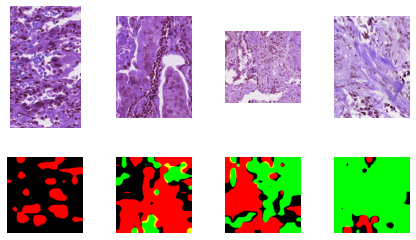

In [38]:
# check if the dataloader works
check_loader = LUAD(image_list=image_path_list)

print(len(check_loader))
fig = plt.figure()

for i in range(len(check_loader)):
    #sample = check_loader[i]
    image, mask = check_loader[i]

    print(i, image.shape, mask.shape)

    ax = plt.subplot(2, 4, i + 1)
    plt.tight_layout()
    #ax.set_title(sample['labels'])
    ax.axis('off')
    plt.imshow(image)

    ax = plt.subplot(2, 4, i + 1 + 4)
    plt.tight_layout()
    #ax.set_title(sample['labels'])
    ax.axis('off')
    plt.imshow(mask)

    if i == 3:
        plt.show()
        break

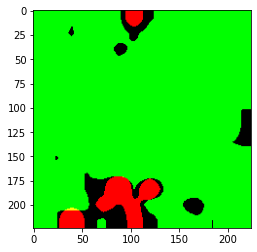

In [53]:
plt.imshow(mask)

In [54]:
mask.dtype

dtype('float64')

In [56]:
image = cv2.resize(image, (224, 224))

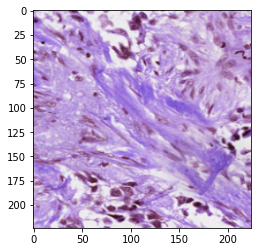

In [57]:
plt.imshow(image)

In [58]:
image.shape

(224, 224, 3)